In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Toggle Notebook Settings

In [3]:
parse_data = False

# Parse / Import Dataset

In [4]:
if parse_data:
  site_ids_missing_cols = []
  data = pd.DataFrame(columns=['source','site_id','date','water_lvl_max','water_lvl_max_code','water_lvl_median','water_lvl_median_code','water_lvl_min','water_lvl_min_code'])
  i = 0
  with open('/content/drive/MyDrive/Capstone - Fate of Snow 2.0/Data/dv.txt') as f:
    for line in f:
      i += 1
      print(i)

      if line[:4] == 'USGS':
        data_cols = line.split('\t')
        if len(data_cols) == 9:
          data.loc[i] = data_cols
        elif len(data_cols) == 7:
          data_cols += ['','']
          data.loc[i] = data_cols
        elif len(data_cols) == 5:
          data_cols += ['','','','']
          data.loc[i] = data_cols
        else:
          site_ids_missing_cols.append(data_cols[1])

        if i % 10000 == 0:
          data.to_csv(f'/content/drive/MyDrive/Capstone - Fate of Snow 2.0/Data/dv_parsed_{i}.csv')
          data = pd.DataFrame(columns=['source','site_id','date','water_lvl_max','water_lvl_max_code','water_lvl_median','water_lvl_median_code','water_lvl_min','water_lvl_min_code'])

    data.to_csv(f'/content/drive/MyDrive/Capstone - Fate of Snow 2.0/Data/dv_parsed_{i}.csv')

    data = pd.DataFrame(columns=['source','site_id','date','water_lvl_max','water_lvl_max_code','water_lvl_median','water_lvl_median_code','water_lvl_min','water_lvl_min_code'])
  
  # aggregate batches
  for batch in [i*10000 for i in range(1, int(i/10000)+1)] + [i]:
    path = f"/content/drive/MyDrive/Capstone - Fate of Snow 2.0/Data/dv_parsed_{batch}.csv"
    batch_data = pd.read_csv(path, index_col = 0)
    data = pd.concat([data, batch_data], axis=0, ignore_index=True)

else:
  data = pd.read_csv("/content/drive/MyDrive/Capstone - Fate of Snow 2.0/Data/dv_parsed_full.csv", index_col=0)
  data['date'] = pd.to_datetime(data['date'])

data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,source,site_id,date,water_lvl_max,water_lvl_max_code,water_lvl_median,water_lvl_median_code,water_lvl_min,water_lvl_min_code
0,USGS,323313117033901,2016-09-01,1.62,A,1.56,A,1.48,A\n
1,USGS,323313117033901,2016-09-02,1.56,A,1.51,A,1.48,A\n
2,USGS,323313117033901,2016-09-03,1.55,A,1.51,A,1.48,A\n
3,USGS,323313117033901,2016-09-04,1.56,A,1.52,A,1.48,A\n
4,USGS,323313117033901,2016-09-05,1.57,A,1.54,A,1.51,A\n
...,...,...,...,...,...,...,...,...,...
577547,USGS,383930122494801,2022-09-14,148.31,P,148.18,P,148.44,P\n
577548,USGS,383930122494801,2022-09-15,148.24,P,148.13,P,148.44,P\n
577549,USGS,383930122494801,2022-09-16,148.32,P,148.14,P,148.48,P\n
577550,USGS,383930122494801,2022-09-17,148.37,P,148.22,P,148.57,P\n


# Merge with Hydrologic Unit Data

In [5]:
hydrologic_unit_df = pd.read_csv('/content/drive/MyDrive/Capstone - Fate of Snow 2.0/sites_per_hydrological_unit.csv')
hydrologic_unit_df

,hydrological_unit_id,hydrological_unit_name,site_id
0,18010110,Russian,383930122494801
1,18010201,Williamson,430029121552101
2,18010201,Williamson,430649121305201
3,18010202,Sprague,423035121331401
4,18010203,Upper Klamath Lake,424517122031501
...,...,...,...
491,18100204,Salton Sea,324459114521702
492,18100204,Salton Sea,324516114594101
493,18100204,Salton Sea,324525114500701
494,18100204,Salton Sea,324630114501501


In [6]:
data_merged = pd.merge(data, hydrologic_unit_df, how='left', on='site_id')
# data_merged['hydrological_unit_id'] = pd.to_numeric(data_merged['hydrological_unit_id'], downcast='integer')
data_merged.to_csv('/content/drive/MyDrive/Capstone - Fate of Snow 2.0/Data/dv_parsed_merged.csv')

# Filter by Relevant Hydrologic Unit IDs

In [28]:
# need to determine which IDs we need

central_basin_ids = [
  18020151,
  18020152,
  18020153,
  18020154,
  18020155,
  18020156,
  18020157,
  18020115,
  18020158,
  18020104,
  18020159,
  18020126,
  18020161,
  18020116,
  18020111,
  18020163,
  18020125,
  18040013,
  18040012,
  18040003,
  18040011,
  18040051,
  18040010,
  18040002,
  18040008,
  18040001,
  18040007,
  18030009,
  18030012,
  18030006,
  18030005,
  18030004,
  18030003,
]

len(central_basin_ids)

33

In [31]:
HUC8_included = list(data_merged[data_merged.hydrological_unit_id.isin(central_basin_ids)].hydrological_unit_id.unique())
HUC8_included

[18030003.0, 18030012.0, 18030004.0]

In [27]:
len(data_merged[data_merged.hydrological_unit_id.isin(central_basin_ids)].site_id.unique())

19

In [32]:
for HU in HUC8_included:
  print(HU, ":", len(data_merged[data_merged.hydrological_unit_id == HU].site_id.unique()))

18030003.0 : 5
18030012.0 : 10
18030004.0 : 4


# Explore Data

In [9]:
data_clean = data_merged[data_merged.hydrological_unit_id.notnull()]
data_clean['water_lvl_max'] = pd.to_numeric(data_clean['water_lvl_max'], errors='coerce')
data_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,source,site_id,date,water_lvl_max,water_lvl_max_code,water_lvl_median,water_lvl_median_code,water_lvl_min,water_lvl_min_code,hydrological_unit_id,hydrological_unit_name
0,USGS,323313117033901,2016-09-01,1.62,A,1.56,A,1.48,A\n,18070305.0,Cottonwood-Tijuana
1,USGS,323313117033901,2016-09-02,1.56,A,1.51,A,1.48,A\n,18070305.0,Cottonwood-Tijuana
2,USGS,323313117033901,2016-09-03,1.55,A,1.51,A,1.48,A\n,18070305.0,Cottonwood-Tijuana
3,USGS,323313117033901,2016-09-04,1.56,A,1.52,A,1.48,A\n,18070305.0,Cottonwood-Tijuana
4,USGS,323313117033901,2016-09-05,1.57,A,1.54,A,1.51,A\n,18070305.0,Cottonwood-Tijuana
...,...,...,...,...,...,...,...,...,...,...,...
577547,USGS,383930122494801,2022-09-14,148.31,P,148.18,P,148.44,P\n,18010110.0,Russian
577548,USGS,383930122494801,2022-09-15,148.24,P,148.13,P,148.44,P\n,18010110.0,Russian
577549,USGS,383930122494801,2022-09-16,148.32,P,148.14,P,148.48,P\n,18010110.0,Russian
577550,USGS,383930122494801,2022-09-17,148.37,P,148.22,P,148.57,P\n,18010110.0,Russian


In [10]:
(data_clean.groupby(['site_id']).date.min().reset_index().date == '2016-09-01').sum()

216

In [11]:
by_site = data_clean.groupby(['site_id']).date.min().reset_index()
sites_2016 = list(by_site[by_site.date == '2016-09-01'].site_id)
sites_2016

[323313117033901,
 323313117033902,
 323313117033903,
 323313117033904,
 323313117033905,
 323527117050001,
 323527117050002,
 323527117050003,
 323527117050004,
 323527117050005,
 323528117031401,
 323528117031402,
 323528117031403,
 323528117031404,
 323528117031405,
 323659117033301,
 323659117033302,
 323659117033303,
 323659117033304,
 323659117033305,
 323659117033306,
 323915117055301,
 323915117055302,
 323915117055303,
 323915117055304,
 323915117055305,
 323932117050801,
 323932117050802,
 323932117050803,
 323932117050804,
 323932117050805,
 323932117050806,
 324055117064401,
 324055117064402,
 324055117064403,
 324055117064404,
 324055117064405,
 324116117050801,
 324116117050802,
 324116117050803,
 324116117050804,
 324116117050805,
 324307117063501,
 324307117063502,
 324307117063503,
 324307117063504,
 324307117063505,
 324307117063506,
 324416117042001,
 324416117042002,
 324416117042003,
 324416117042004,
 324416117042005,
 324416117042006,
 324641117071501,
 324641117

In [12]:
len(data_clean.site_id.unique())

329

In [13]:
print(len(data_clean.hydrological_unit_id.unique()), 'unique hydrologic units')
hydrologic_units = list(data_clean.hydrological_unit_id.unique())
hydrologic_units

19 unique hydrologic units


[18070305.0,
 18070304.0,
 18070302.0,
 18070202.0,
 18100201.0,
 18070203.0,
 18070104.0,
 18100100.0,
 18060013.0,
 18090206.0,
 18070102.0,
 18060009.0,
 18090208.0,
 18030003.0,
 18090207.0,
 18030012.0,
 18030004.0,
 18060005.0,
 18010110.0]

In [14]:
by_HU_SI = data_clean.groupby(['hydrological_unit_id','site_id']).date.count().reset_index()
by_HU_SI.groupby(['hydrological_unit_id']).site_id.count().reset_index()

,hydrological_unit_id,site_id
0,18010110.0,1
1,18030003.0,5
2,18030004.0,4
3,18030012.0,10
4,18060005.0,7
5,18060009.0,17
6,18060013.0,1
7,18070102.0,7
8,18070104.0,5
9,18070202.0,1


In [ ]:
for site in sites_2016:
  plt.figure(figsize=(15,5))
  plt.plot(data_clean[data_clean.site_id == site].date, data_clean[data_clean.site_id == site].water_lvl_max)
  plt.title(f"Well Number {int(site)}")
  plt.show()

# Sum of Water Level by Day per Hydrological Unit

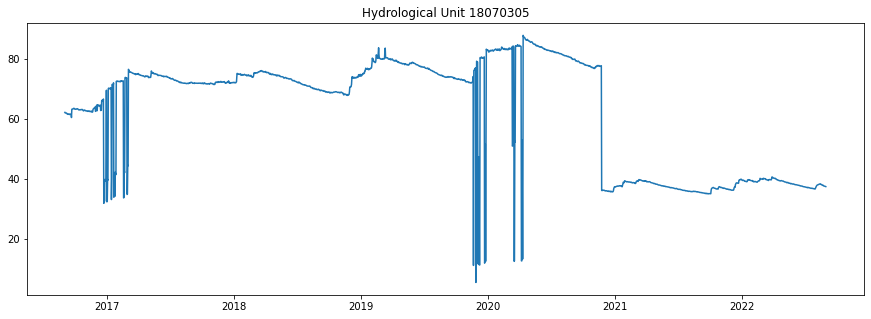

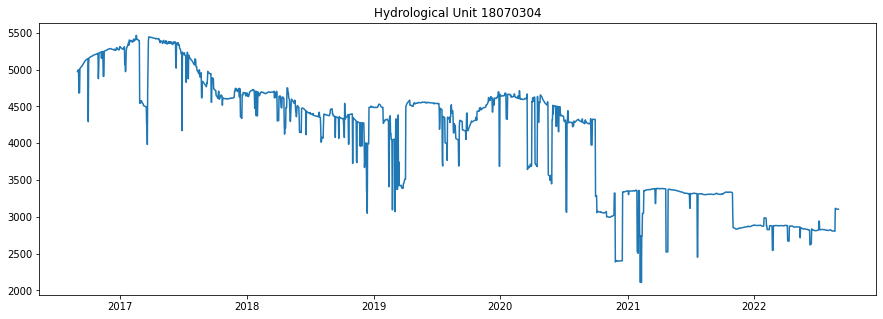

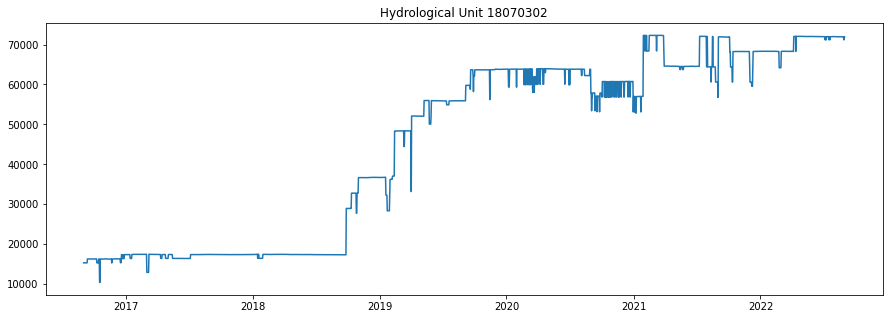

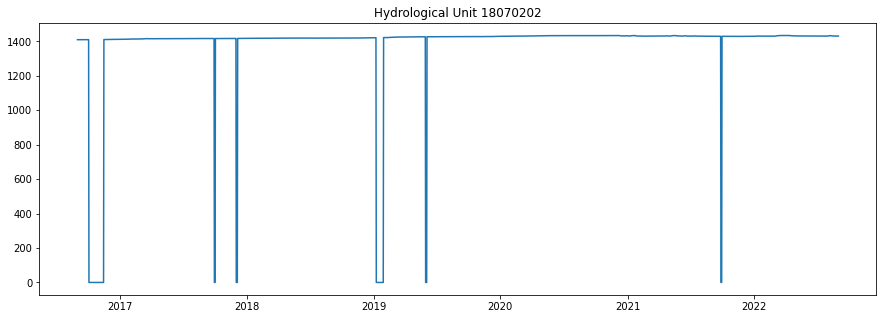

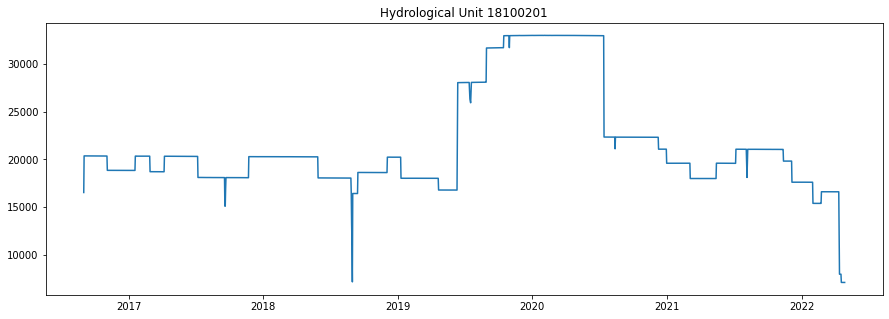

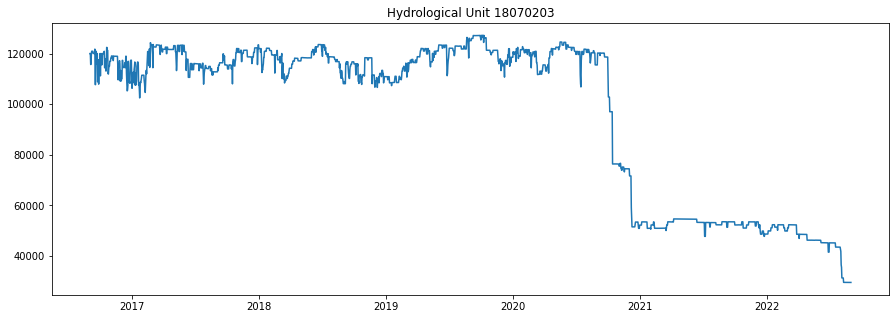

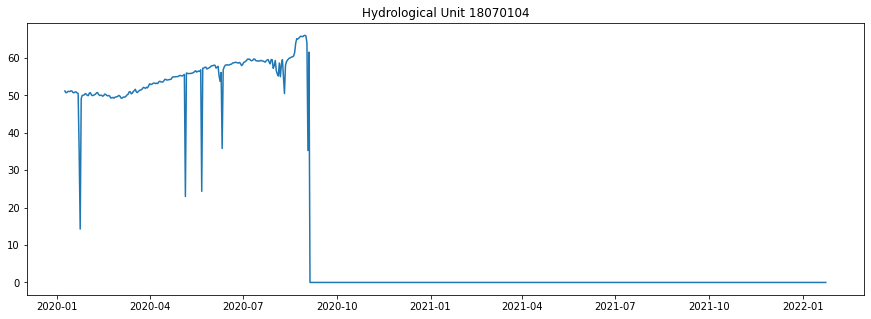

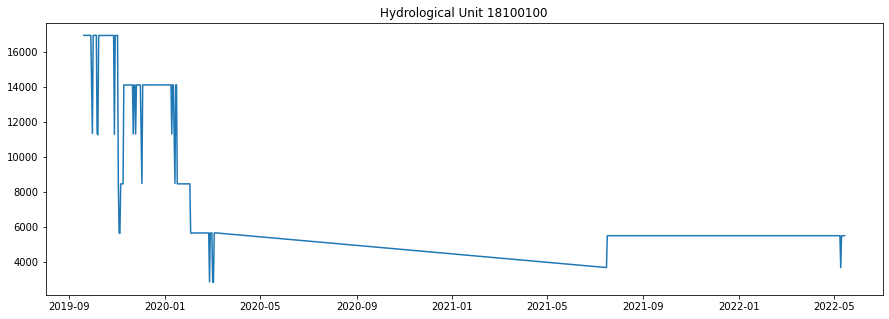

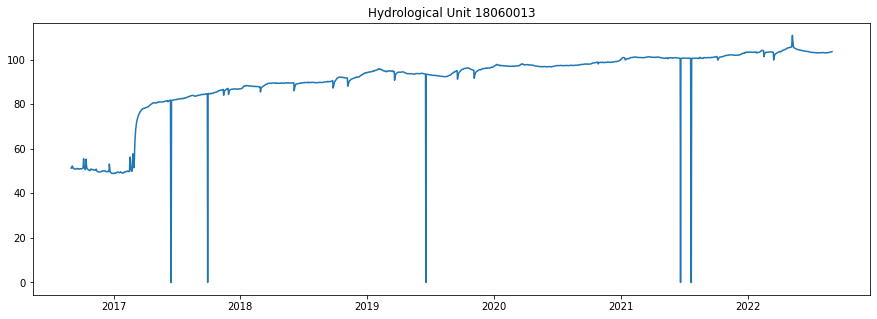

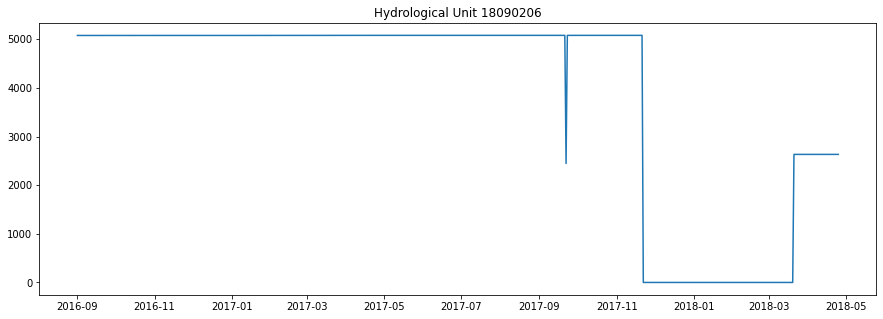

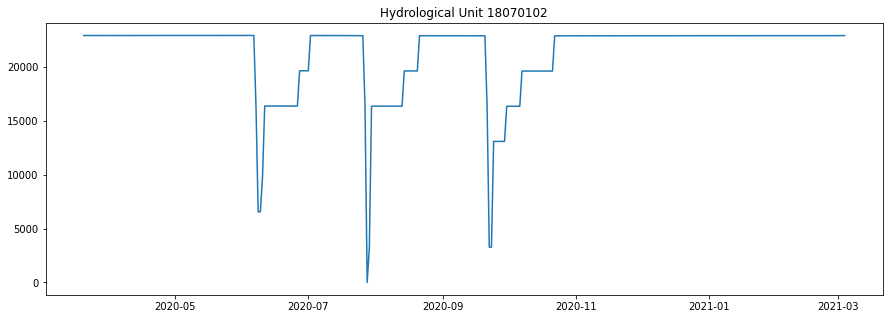

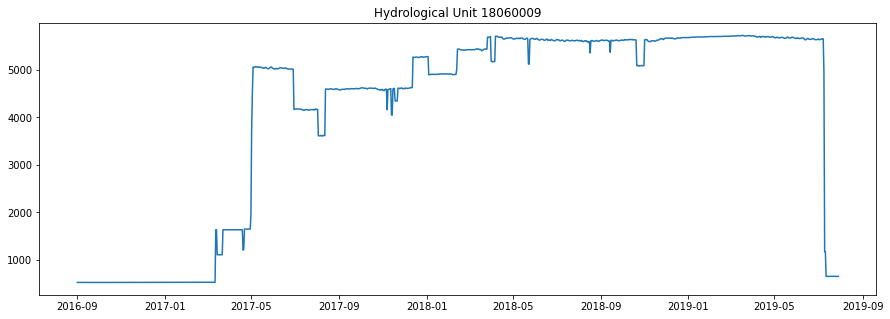

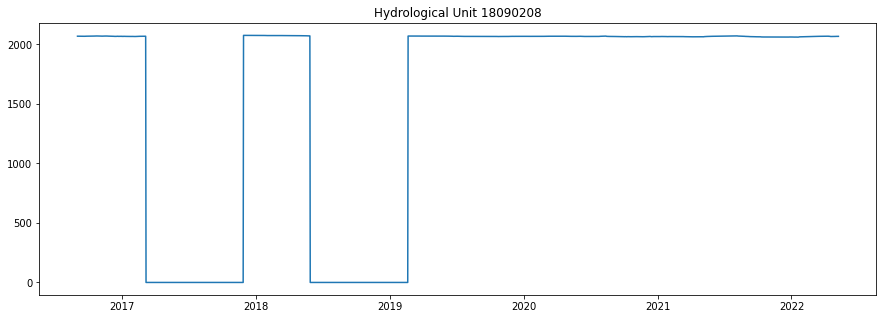

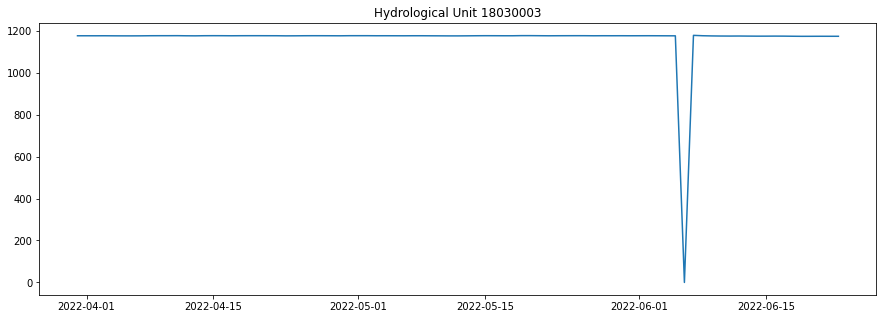

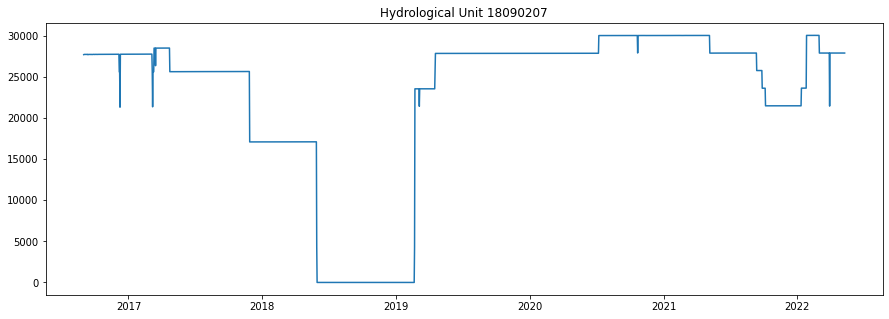

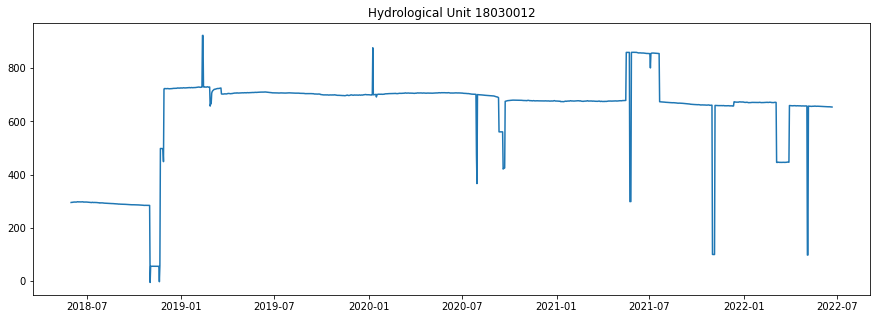

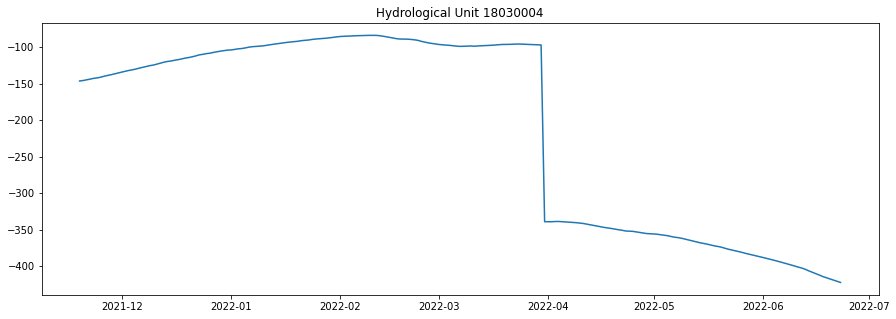

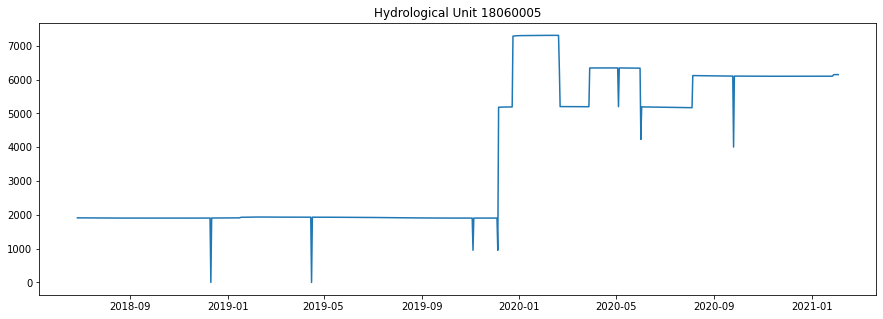

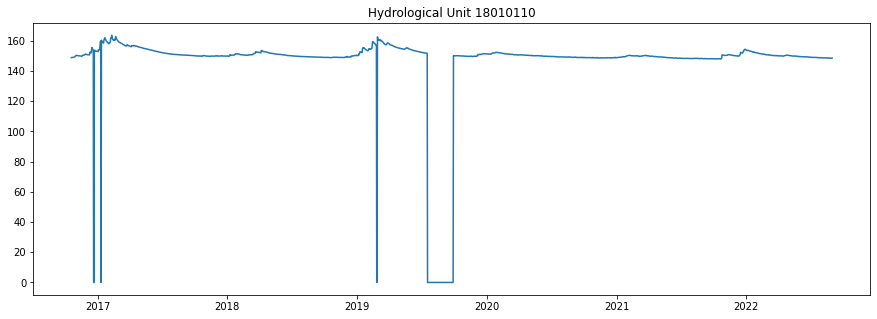

In [16]:
by_HU_day = data_clean[data_clean.date < '2022-09'].groupby(['hydrological_unit_id','date']).water_lvl_max.sum().reset_index()

for HU in list(data_clean.hydrological_unit_id.unique()):
  plt.figure(figsize=(15,5))
  plt.plot(by_HU_day[by_HU_day.hydrological_unit_id == HU].date, by_HU_day[by_HU_day.hydrological_unit_id == HU].water_lvl_max)
  plt.title(f"Hydrological Unit {int(HU)}")
  plt.show()

# Sum Across all Hydrologic Units

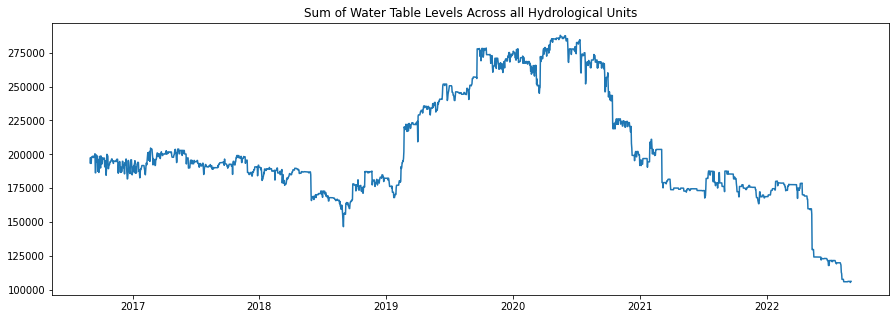

In [17]:
by_day = by_HU_day.groupby(['date']).water_lvl_max.sum().reset_index()

plt.figure(figsize=(15,5))
plt.plot(by_day.date, by_day.water_lvl_max)
plt.title("Sum of Water Table Levels Across all Hydrological Units")
plt.show()

In [18]:
summary_stats = pd.DataFrame(columns = ['count','mean','std','min','25%','50%','75%','max'])
for site in sites_2016:
  sum_stats = data_clean[data_clean.site_id == site].water_lvl_max.describe()
  summary_stats.loc[site] = list(sum_stats)

summary_stats

,count,mean,std,min,25%,50%,75%,max
323313117033901,2197.0,5.339331,1.472165,1.50,4.3900,5.56,6.60,7.60
323313117033902,1527.0,4.506490,1.267926,1.40,3.6900,4.34,5.35,6.56
323313117033903,1518.0,4.442299,1.292130,1.39,3.6200,4.27,5.25,6.49
323313117033904,1496.0,30.323269,1.257904,27.56,29.3500,30.42,31.37,32.97
323313117033905,2189.0,31.039223,1.552656,27.38,29.9600,30.99,32.24,35.48
...,...,...,...,...,...,...,...,...
351809116375901,1547.0,2139.034124,2.985837,2133.53,2136.0550,2140.08,2141.51,2143.75
351811116361701,1557.0,2145.486108,5.655238,2116.41,2141.9700,2147.99,2149.27,2150.37
351828116371201,1810.0,2124.423718,4.830096,2097.06,2120.6625,2126.08,2128.32,2130.31
351828116371202,1809.0,2124.301189,4.813198,2109.61,2120.4900,2125.96,2128.22,2130.23


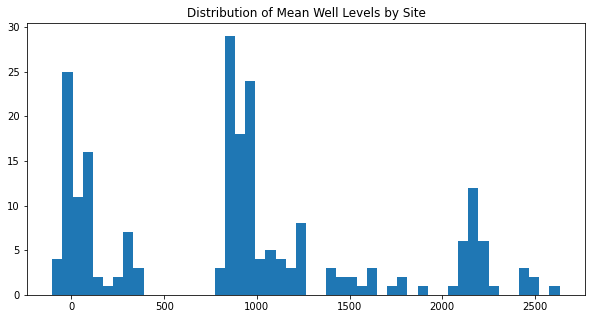

In [19]:
plt.figure(figsize=(10,5))
plt.hist(summary_stats['mean'], bins=50)
plt.title("Distribution of Mean Well Levels by Site")
plt.show()

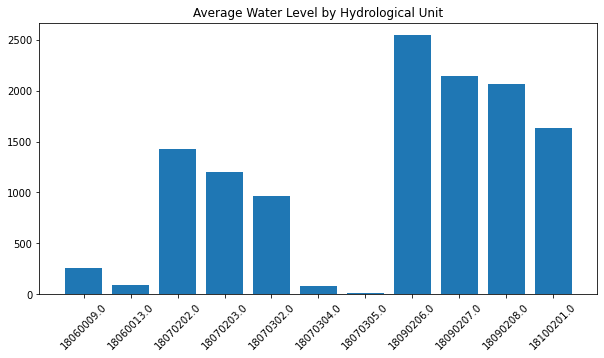

In [20]:
by_HU_date_mean = data_clean[data_clean.site_id.isin(sites_2016)].groupby(['hydrological_unit_id']).water_lvl_max.mean().reset_index()

# plt.bar(by_HU_date_mean.hydrological_unit_id, by_HU_date_mean.water_lvl_max)

plt.figure(figsize=(10,5))
plt.bar(by_HU_date_mean.hydrological_unit_id.astype('str'), by_HU_date_mean.water_lvl_max)
plt.title("Average Water Level by Hydrological Unit")
plt.xticks(rotation=45)
plt.show()

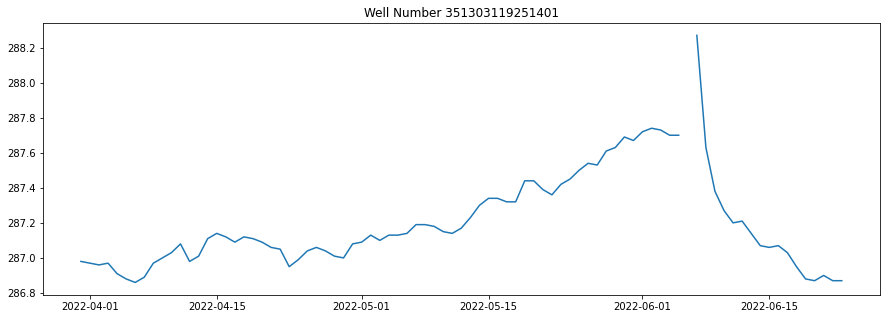

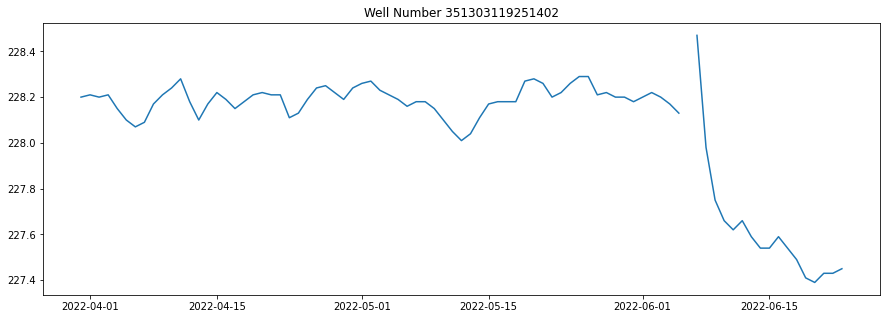

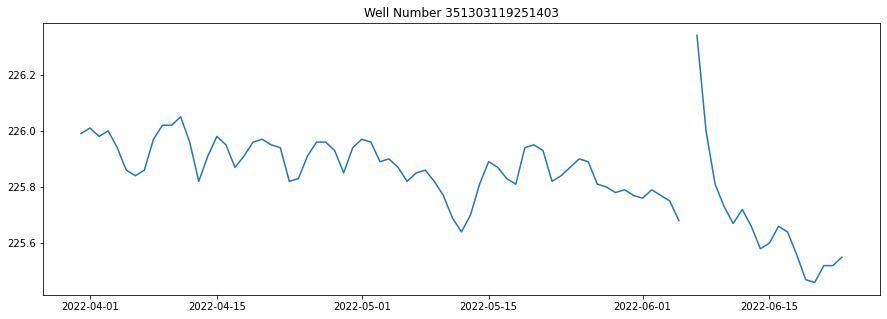

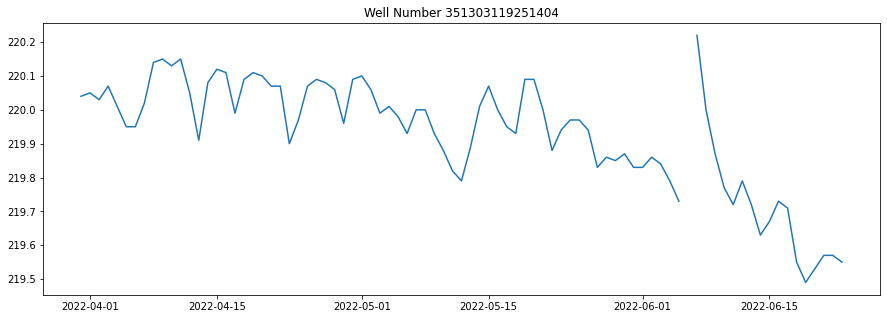

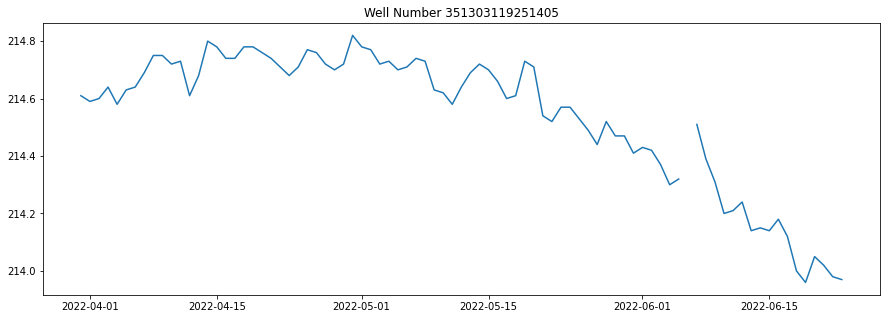

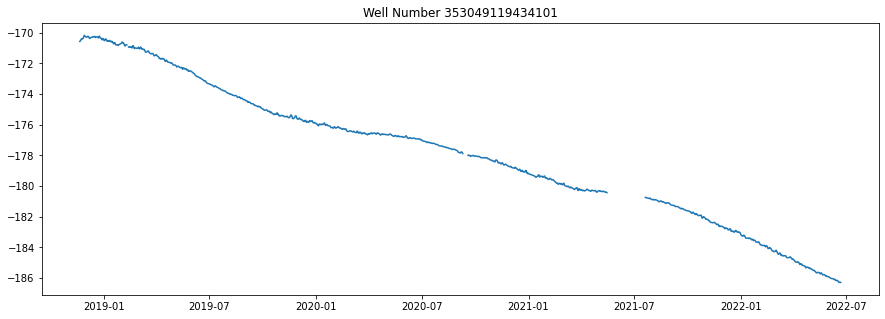

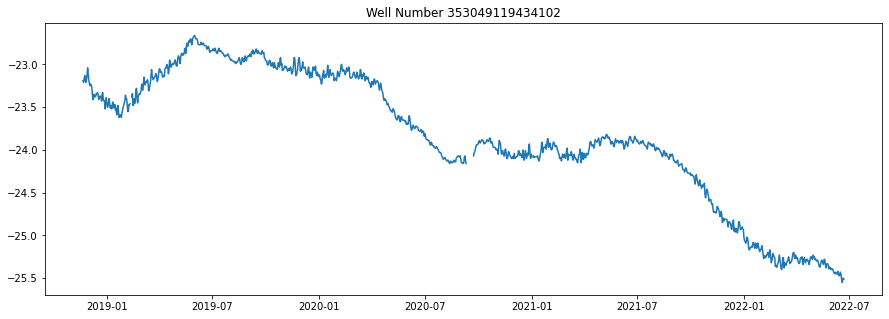

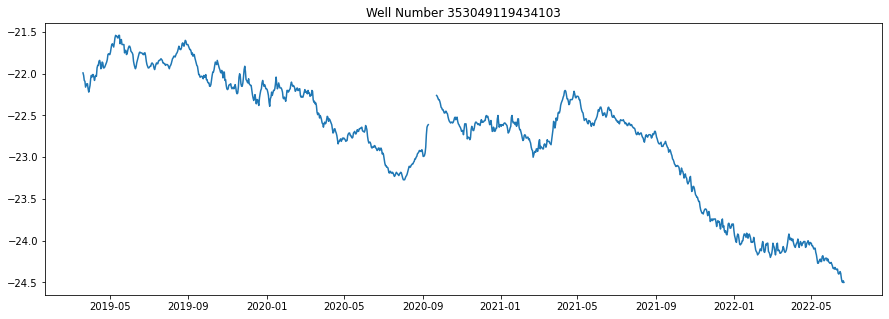

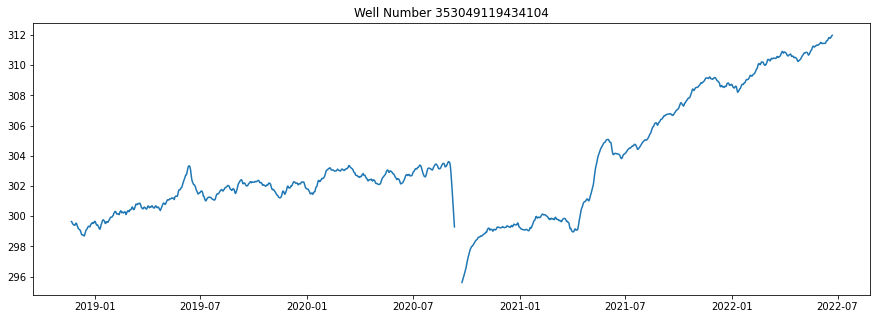

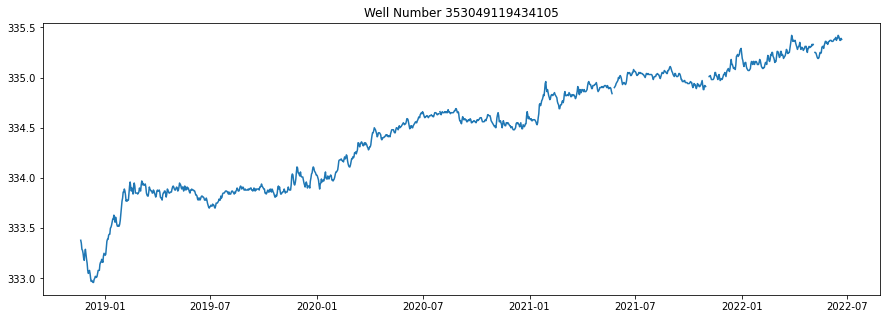

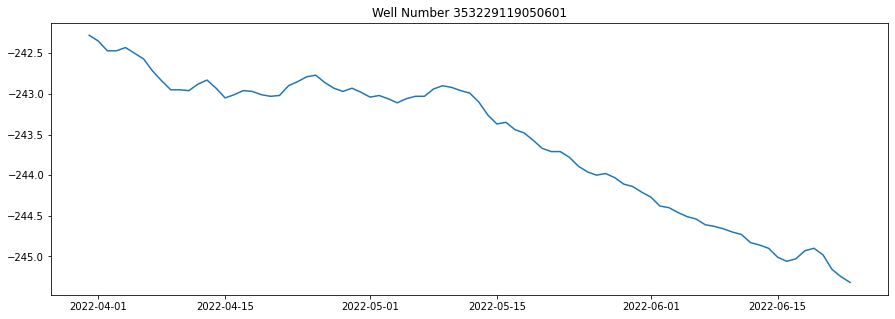

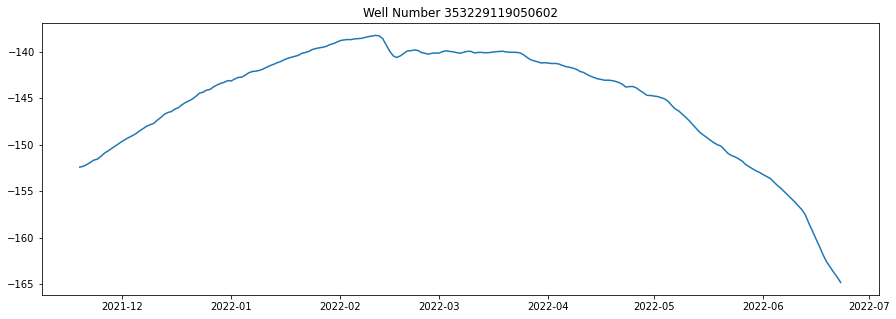

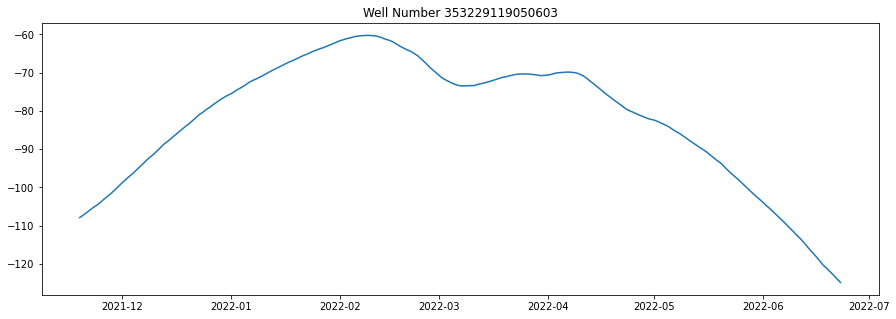

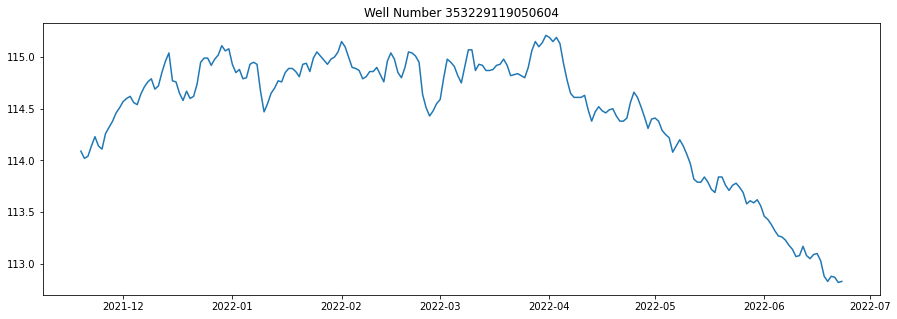

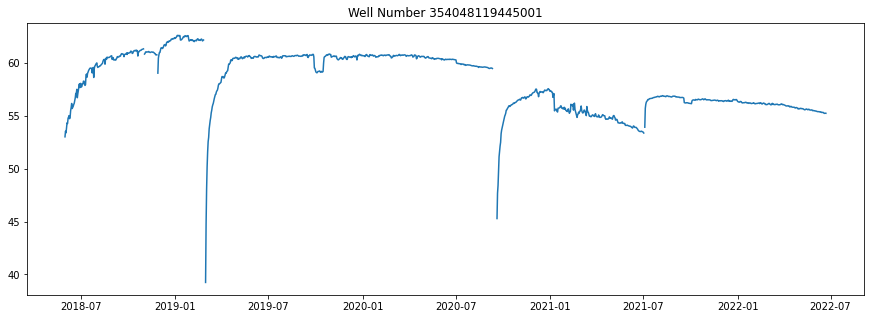

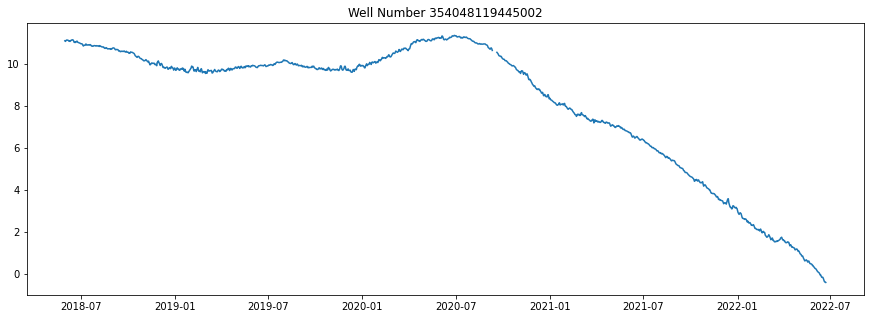

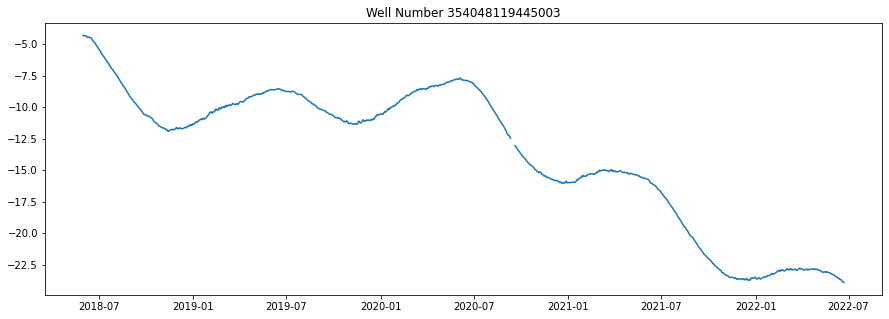

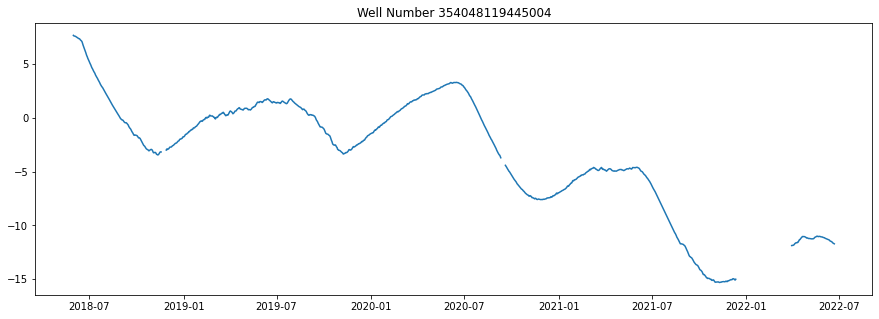

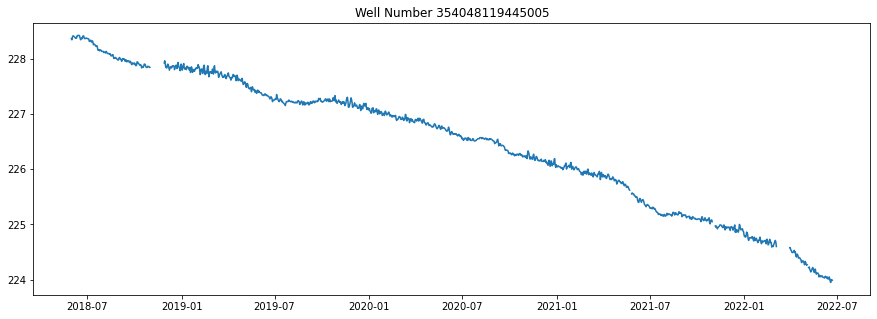

In [33]:
for site in data_clean[data_clean.hydrological_unit_id.isin(central_basin_ids)].site_id.unique():
  plt.figure(figsize=(15,5))
  plt.plot(data_clean[data_clean.site_id == site].date, data_clean[data_clean.site_id == site].water_lvl_max)
  plt.title(f"Well Number {int(site)}")
  plt.show()